In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'device_name': 'METAL'}


In [3]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Physical devices:", tf.config.list_physical_devices())

# Specifically check for a GPU
if tf.config.list_physical_devices('GPU'):
    print("GPU is available.")
else:
    print("GPU is not available.")

TensorFlow version: 2.15.0
Physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU is available.


In [4]:
from tensorflow.keras import layers

In [5]:
train_folder_path = '/Users/anishasiva/Desktop/dermnet/dermnet data/train'

In [6]:
import pathlib
derm_data = pathlib.Path(train_folder_path)

In [7]:
print(derm_data)

/Users/anishasiva/Desktop/dermnet/dermnet data/train


In [8]:
height,width=224,224

In [9]:
training_batch_size=32

In [10]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
derm_data,
validation_split=0.2,
subset="training",
seed=123,
image_size=(height,width),
batch_size=training_batch_size)

Found 15557 files belonging to 23 classes.
Using 12446 files for training.


2024-01-20 23:33:33.274721: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-20 23:33:33.274753: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-20 23:33:33.274761: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-20 23:33:33.274788: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-20 23:33:33.274809: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
image_cat = train_set.class_names
print(image_cat)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [12]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
derm_data,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(height, width),
batch_size=training_batch_size)

Found 15557 files belonging to 23 classes.
Using 3111 files for validation.


In [13]:
class_names = train_set.class_names
print(class_names)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


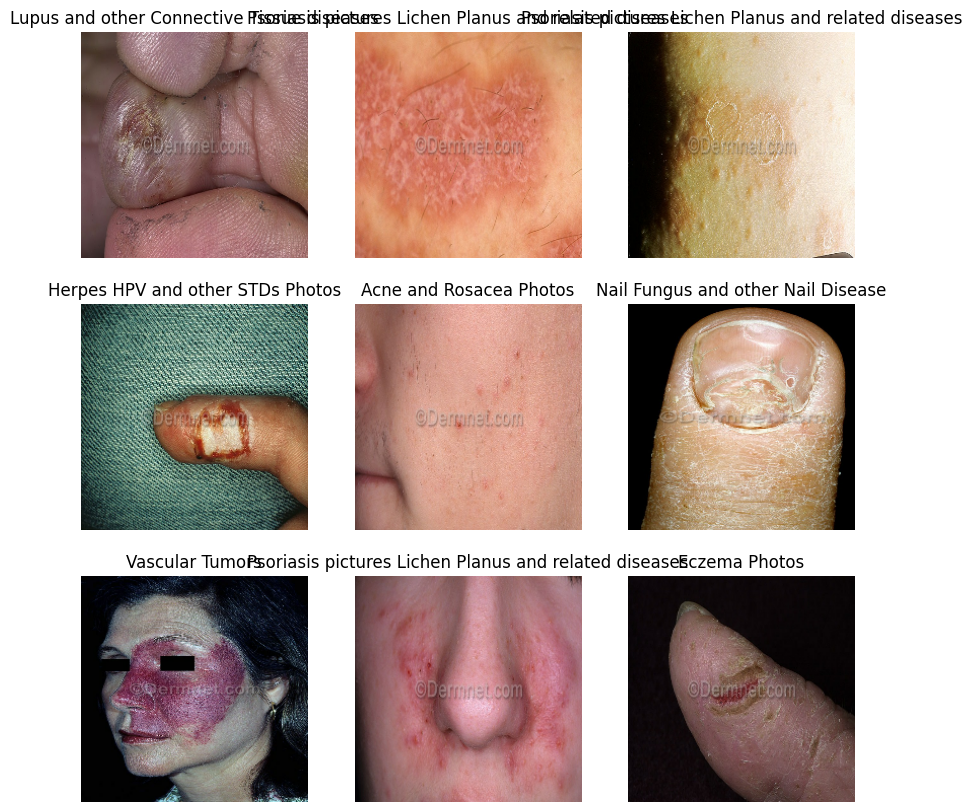

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.cache().prefetch(buffer_size=AUTOTUNE)
validation_set = validation_set.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
train_img_count = 487

In [18]:
list_ds = tf.data.Dataset.list_files(str(derm_data/'*/*'), shuffle=False)

list_ds = list_ds.shuffle(train_img_count, reshuffle_each_iteration=False)

In [19]:
for f in list_ds.take(-5):
  print(f.numpy())

b'/Users/anishasiva/Desktop/dermnet/dermnet data/train/Acne and Rosacea Photos/acne-cystic-113.jpg'
b'/Users/anishasiva/Desktop/dermnet/dermnet data/train/Acne and Rosacea Photos/acne-open-comedo-72.jpg'
b'/Users/anishasiva/Desktop/dermnet/dermnet data/train/Acne and Rosacea Photos/acne-cystic-96.jpg'
b'/Users/anishasiva/Desktop/dermnet/dermnet data/train/Acne and Rosacea Photos/acne-closed-comedo-38.jpg'
b'/Users/anishasiva/Desktop/dermnet/dermnet data/train/Acne and Rosacea Photos/hidradenitis-suppurativa-52.jpg'
b'/Users/anishasiva/Desktop/dermnet/dermnet data/train/Acne and Rosacea Photos/acne-closed-comedo-10.jpg'
b'/Users/anishasiva/Desktop/dermnet/dermnet data/train/Acne and Rosacea Photos/acne-pustular-27.jpg'
b'/Users/anishasiva/Desktop/dermnet/dermnet data/train/Acne and Rosacea Photos/acne-closed-comedo-34.jpg'
b'/Users/anishasiva/Desktop/dermnet/dermnet data/train/Acne and Rosacea Photos/acne-excoriated-2.jpg'
b'/Users/anishasiva/Desktop/dermnet/dermnet data/train/Acne and 

In [20]:
val_size = int(train_img_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [21]:
print(tf.data.experimental.cardinality(list_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

15557
97


In [22]:
class_names

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [23]:
import os
#import tensorflow as tf  # Make sure to import tensorflow
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)



In [24]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [224, 224])

In [25]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [26]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [27]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  0


In [28]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(training_batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

2024-01-20 23:33:48.071920: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


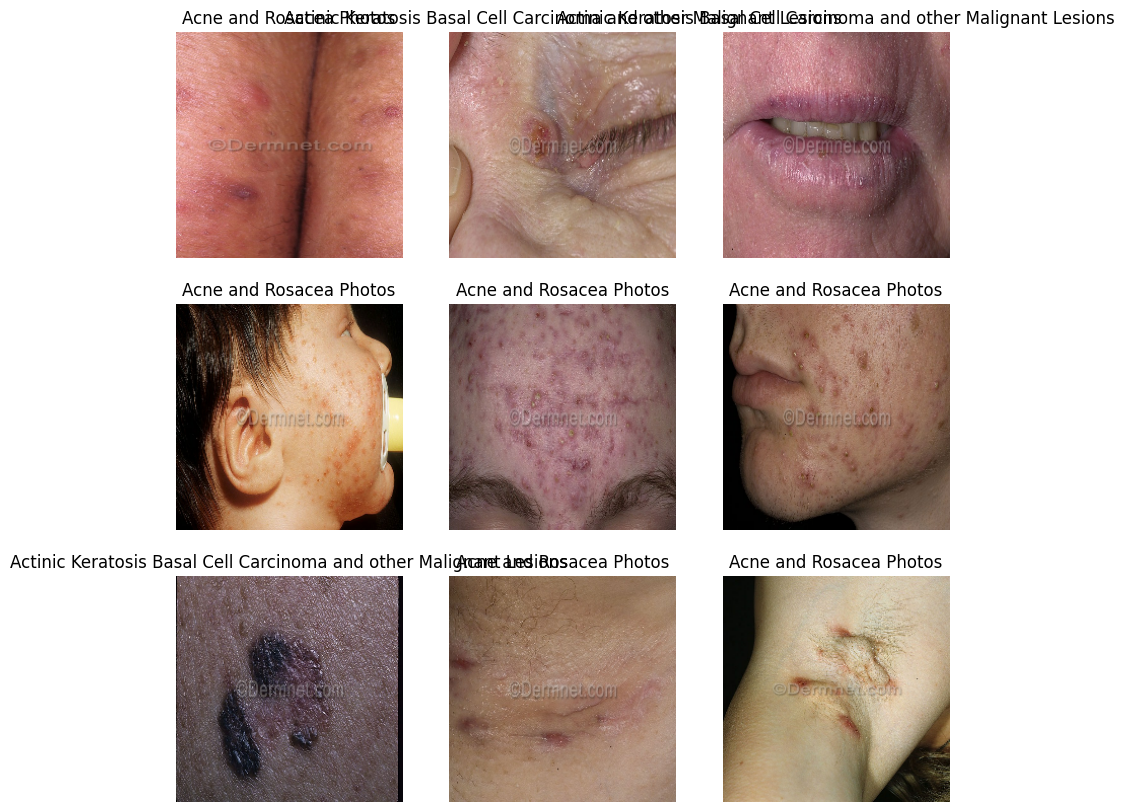

In [29]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [30]:
#DATA AUGMENTATION


In [31]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [32]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [33]:
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

2024-01-20 23:33:50.943825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-20 23:33:50.979093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-01-20 23:33:51.027374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-20 23:33:51.032547: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2024-01-20 23:33:51.058442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation d

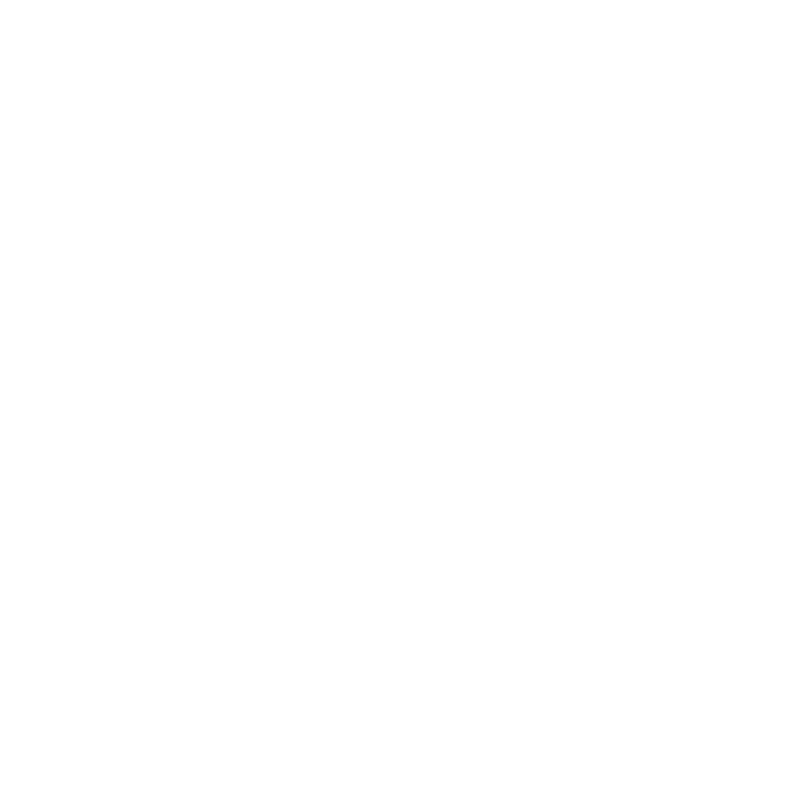

In [34]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [35]:
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

In [36]:
#counter = 0
#for i in train_set:
    #counter = counter + 1
   
#print(counter)

In [37]:
#counter = 0
#for i in validation_set:
    #counter = counter + 1
   
#print(counter)

In [38]:
from tensorflow.keras.models import Sequential
from keras.applications.resnet50 import ResNet50
derm_model = Sequential()




In [39]:
imported_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (224, 224, 3),
                                                pooling = 'avg',
                                                classes = 23,
                                                weights = 'imagenet')
for layers in imported_model.layers:
    layers.trainable=True 
                                                
                            

In [40]:
imported_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [41]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


#derm_model.add(imported_model)
#derm_model.add(tf.keras.layers.Rescaling(1./255))
#derm_model.add(Flatten())
#derm_model.add(Dense(512, activation='relu'))
##derm_model.add(tf.keras.Linear(23))
##derm_model.add(Dense(23, activation='softmax'))


In [44]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Dropout




derm_model.add(imported_model)
derm_model.add(tf.keras.layers.Rescaling(1./255))
derm_model.add(Flatten())
derm_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization
derm_model.add(Dropout(0.5))  # Dropout
derm_model.add(Dense(23, activation='softmax'))


In [46]:
derm_model.build()
derm_model.summary()



ValueError: You must provide an `input_shape` argument.

In [ ]:
from tensorflow.keras.optimizers import legacy
from keras.metrics import Precision, Recall, AUC

optimizer = legacy.Adam(learning_rate = 0.0001)


derm_model.compile(optimizer = optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics = ['accuracy']
)


In [ ]:
history = derm_model.fit(
aug_ds,
validation_data=val_ds,
epochs=3
)
